Estamos atuando em uma empresa de consultoria de marketing e enfrentamos um desafio significativo: segmentar nossas bases de clientes de acordo com seus interesses. Essa segmentação é crucial para que possamos desenvolver campanhas de marketing eficazes.

Sem uma segmentação clara, frequentemente enfrentamos altos custos na criação, elaboração e divulgação de campanhas, sem conseguir o retorno esperado sobre esse investimento. Embora os dados que coletamos sejam ricos em informações, identificar os interesses e padrões de consumo dos nossos clientes e categorizá-los de forma eficiente é uma tarefa que se revela extremamente desafiadora, se não impossível, apenas com análise manual.

Nossa missão será desenvolver um modelo de machine learning capaz de identificar padrões em nossos dados e segmentar nossos consumidores de acordo com suas áreas de interesse. Além disso, precisamos analisar e determinar as características específicas dessas áreas de interesse.

Por último, iremos disponibilizar tanto o modelo quanto os resultados obtidos para a equipe de marketing, permitindo que eles elaborem campanhas mais direcionadas e eficazes.

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('dados_mkt.csv')
df.head()

,sexo,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,...,musica,rock,cabelo,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas
0,F,27,49,0,0,10,0,0,10,0,...,0,0,0,0,0,0,0,0,0,10
1,F,27,41,0,0,0,0,0,0,0,...,10,20,40,0,10,0,0,0,0,10
2,F,26,1,0,0,0,0,0,10,0,...,10,0,50,0,0,0,30,0,0,0
3,M,28,32,0,50,0,0,0,0,0,...,10,10,0,0,0,0,0,0,0,0
4,M,28,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,0,0,0


In [204]:
df.shape

(12992, 27)

Não temos nenhum rótulo nos dados, ou seja, um valor esperado. Temos apenas as características de cada amostra. Isso significa que estamos lidando com dados **não rotulados**.

Uma técnica de Machine Learning que podemos utilizar para resolver este problema é a **Clusterização** que vaia grupar/segmentar o conjunto de dados de acordo com a proximidade entre suas características.

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12992 entries, 0 to 12991
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sexo               12992 non-null  object
 1   idade              12992 non-null  int64 
 2   numero_de_amigos   12992 non-null  int64 
 3   basquete           12992 non-null  int64 
 4   futebol_americano  12992 non-null  int64 
 5   futebol            12992 non-null  int64 
 6   softbol            12992 non-null  int64 
 7   voleibol           12992 non-null  int64 
 8   natacao            12992 non-null  int64 
 9   animacao           12992 non-null  int64 
 10  beisebol           12992 non-null  int64 
 11  tenis              12992 non-null  int64 
 12  esportes           12992 non-null  int64 
 13  fofo               12992 non-null  int64 
 14  danca              12992 non-null  int64 
 15  banda              12992 non-null  int64 
 16  marcha             12992 non-null  int64

Temos a coluna "Sexo" como string, teremos que **ajustar essa coluna de texto para uma coluna numérica**, pois normalmente modelos ligado ao cluster não conseguem lidar com dados textuais.

In [206]:
categorical = df['sexo'].unique() # Temos 3 valores únicos, está é uma coluna categórica

### Pré processamento dos dados
Podemos aplicar diversas técnicas que transformam informações categóricas em informações numéricas.

Uma dessas técnias é a **OneHotEncoder**.

Esta técnica transforma cada categoria em uma coluna binária, onde o valor 1 indica a presença da categoria e 0 a ausência.

In [207]:
from sklearn.preprocessing import OneHotEncoder

# O parametro categories especifica quais são as categorias que queremos codificar
# O parametro sparse_output define o formato de saída do encoder
encoder = OneHotEncoder(categories=[categorical], sparse_output=False)

In [208]:
encoded_sexo = encoder.fit_transform(df[['sexo']])

In [209]:
# 1° param. Array codificado
# 2° param. Adiciona um prefixo às colunas codificadas
encoded_df = pd.DataFrame(encoded_sexo, columns=encoder.get_feature_names_out(['sexo']))
# encoded_df = encoded_df.add_prefix('sexo_') # Aqui tbm adiciona um prefixo, porém manual
encoded_df.head()

,sexo_F,sexo_M,sexo_NE
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [210]:
# axis=1 significa que adicionará colunas
df_encoded = pd.concat([df, encoded_df], axis=1)

# Remove a coluna sexo para ter apenas os valores numéricos
df_encoded.drop('sexo', axis=1, inplace=True)
df_encoded.head()

,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,beisebol,...,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas,sexo_F,sexo_M,sexo_NE
0,27,49,0,0,10,0,0,10,0,0,...,0,0,0,0,0,0,10,1.0,0.0,0.0
1,27,41,0,0,0,0,0,0,0,10,...,0,10,0,0,0,0,10,1.0,0.0,0.0
2,26,1,0,0,0,0,0,10,0,0,...,0,0,0,30,0,0,0,1.0,0.0,0.0
3,28,32,0,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
4,28,18,0,0,0,0,0,0,0,0,...,0,0,0,10,0,0,0,0.0,1.0,0.0


### Transformando o objeto encoder em um arquivo .pkl

Quando trabalhamos com dados, é comum precisarmos aplicar o mesmo tipo de transformação em diferentes momentos, quando recebemos novos dados ou precisamos fazer inferências com o modelo. Ao salvar o **encoder** em um arquivo **.pkl**, podemos carregá-lo novamente e aplicá-lo aos novos dados, evitando ter que refazer todo o processo de codificação.

In [211]:
import joblib as jb

jb.dump(encoder, 'encoder.pkl')

['encoder.pkl']

### Desenvolvendo o modelo com K_Means

Esse modelo irá ser útil para nós por que ele realiza o agrupamento dos dados por proximidade de características, onde realiza este agrupamento em "bolhas", no nosso caso, bolhas de interesse dos usuários do nosso dataset.

In [212]:
from sklearn.cluster import KMeans

# Precisamos definir o número de clusters (agrupamentos)
model_kmeans = KMeans(n_clusters=2, random_state=45)

model_kmeans.fit(df_encoded)

KMeans(n_clusters=2, random_state=45)

### Avaliando o modelo

Temos duas métricas:
- Valor de inércia
- Valor de silhueta

**Inércia:**
- É uma medida que nos permite avaliar a qualidade dos *clusters*, pois **retorna a soma das distâncias ao quadrado entre os pontos dentro do cluster e seu centroide**.
- Quando temos valores mais altos de inércia, os pontos estão mais distantes do centroide, no centro do cluster.
- **Quanto menor a inércia, mais próximos estão esses valores e melhor estará o agrupamento, ou seja, estão mais agrupados**.
- O ideal é ter o valor mais baixo possível de Inércia.

**Silhueta:**
- **Retorna o valor para a separação e coesão dos pontos dentro de um cluster**, comparando-os em relação aos pontos próximos dentro de si e de outros clusters próximos.
- Os valores variam entre 1 e -1, sendo 1 um valor ótimo, indicando que o ponto está bema grupado dentro do cluster.
- Quanto mais próximo de zero, mais próximo o ponto estará das fronteiras do cluster.
- Quando o valor é negativo, próximo a -1, significa que o ponto provavelmente está agrupado de forma errada, num *cluster* onde não deveria estar.
- Não precisamos avaliar o valor de silhueta ponto a ponto. Basta observar o valor médio de silhueta para todas as amostras enviadas ao K-Means.

In [213]:
# Valor de Inércia
model_kmeans.inertia_

24912957.594588578

No caso, nosso valor de inércia é muito alto. Portanto, nosso método de clusterização ainda não é tão adequado. Provavelmente pelo fato de que parametrizamos o KMeans apenas com 2 clusters.

In [214]:
# Valor de Silhueta
from sklearn.metrics import silhouette_score
silhouette_score(df_encoded, model_kmeans.predict(df_encoded))

np.float64(0.3799715886302017)

Esse valor (0.37) indica que em média, nossos valores de silhueta para cada ponto indicam que nossos dados estão mais próximos das fronteiras dos clusters do que de seus centroides.

**Portanto, talvez apenas 2 clusters não são suficientes para agrupar nossos dados.**

### Avaliando métricas para diferentes valores de cluster (K)

In [215]:
def avaliacao(data):
    inertia = []
    silhouette = []

    for k in range(2,21):
        kmeans = KMeans(n_clusters=k, random_state=45)
        kmeans.fit(data)

        inertia.append(kmeans.inertia_)
        silhouette.append(f'k= {k} ' + str(silhouette_score(data, kmeans.predict(data))))

    return silhouette, inertia

In [216]:
silhouette, inertia = avaliacao(df_encoded)

In [217]:
silhouette

['k= 2 0.3799715886302017',
 'k= 3 0.2631947012216279',
 'k= 4 0.27497370057197046',
 'k= 5 0.2762790287828939',
 'k= 6 0.2814107923103627',
 'k= 7 0.19566339131554092',
 'k= 8 0.12271514125212872',
 'k= 9 0.1281093701405103',
 'k= 10 0.13020718009107704',
 'k= 11 0.13209306347804026',
 'k= 12 0.09015815350273831',
 'k= 13 0.09002551845716941',
 'k= 14 0.08959066111262458',
 'k= 15 0.09427696863257996',
 'k= 16 0.09552364235312874',
 'k= 17 0.09543714624178481',
 'k= 18 0.08844412672288283',
 'k= 19 0.0844173588143633',
 'k= 20 0.08484109789709748']

Independentemente dos valores de clusters que escolhermos para esse modelo, o resultado não melhorará muito além do que já analisamos.

**Método do Cotovelo:**
- A inércia ajuda na escolha nos valores de clusters para um modelo de agrupamento.
- Conseguimos ter esse suporte ao observar o valor da inércia em relação a quantidade de clusters.
- Essa observação pode ser feita através do método do cotovelo, uma técnica usada para determinar o número ótimo de clusters em um algoritmo de agrupamento, como o K-Means.
- A ideia por trás deste método é identificar o ponto onde o aumento do número de clusters não resulta em uma melhoria significativa no valor de inércia dentro dos clusters.

Exemplo:
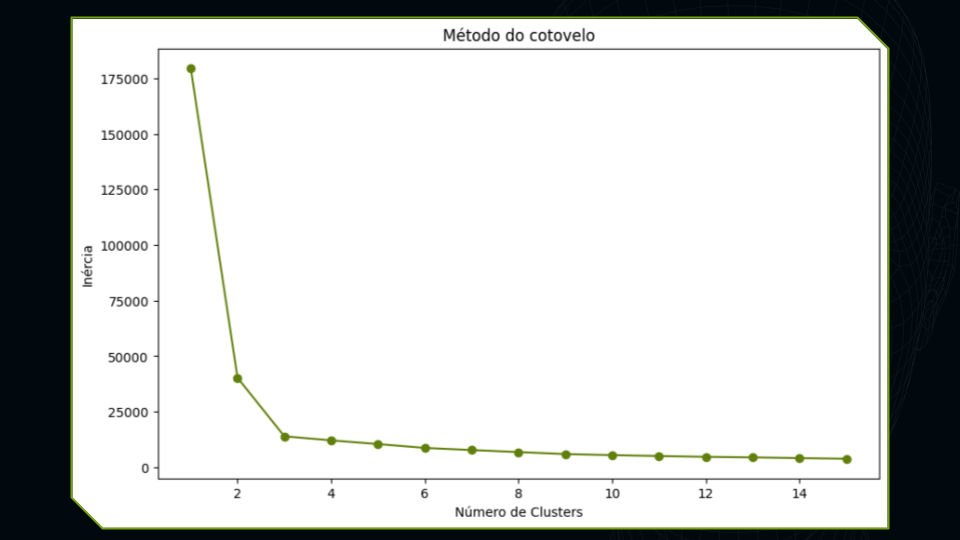

No método do cotovelo, o número ideal de clusters é encontrado ao observar o ponto onde a redução da inércia se torna menos significativa, formando uma curva em "L". Esse ponto de "quebra" indica que adicionar mais clusters não traz melhorias significativas no agrupamento.

In [218]:
# Método do cotovelo
def plot_cotovelo(inertia):
    plt.figure(figsize=(8, 4))
    # 1° param. Clusters de 2 a 20
    # 2° param. Array de valores de inércia
    # "bo-" => 'b' indica que a cor da linha será azul (blue), 'o' indica que os pontos (x,y) ficarão em destaque
    # - (hífen) significa que traçará uma reta entre os pontos
    plt.plot(range(2,21), inertia, 'bo-')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Valor de Inércia')
    plt.title('Método do Cotovelo para Determinação de K')
    plt.show()

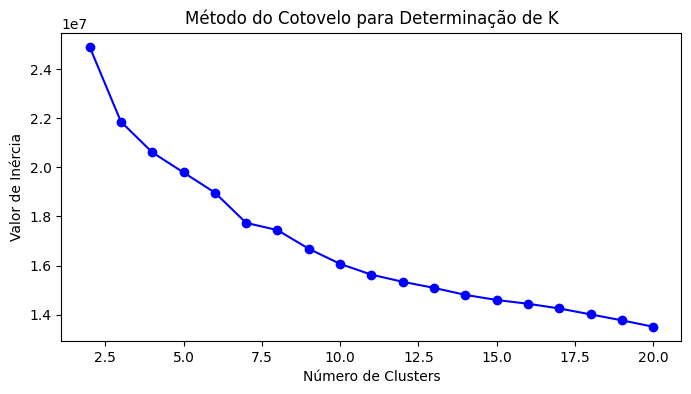

In [219]:
plot_cotovelo(inertia)

Este gráfico do método do cotovelo serve para comprovar que, independentemente do número de clusters, por mais que o número de inércia diminui, não é o suficiente para justificar o aumento do número de clusters.

### Normalização dos dados

O algoritmo **KMeans** é sensível a dados fora de escala, então talvez pelo fato dos dados não estarem na mesma escala, seja o motivo desse problema.

Para ajustarmos os valores e treinarmos o modelo com os dados dentro de uma mesma escala, utilizaremos o algoritmo *MinMaxScaler*.

In [220]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_array = scaler.fit_transform(df_encoded)

# 1° param. array com os dados numéricos escalados
# 2° param. são as colunas do nosso dataframe, as mesmas do dataframe original
df_scaled = pd.DataFrame(scaled_array, columns=df_encoded.columns)

# Salva o scaler como pkl, assim com o encoder
jb.dump(scaler, 'scaler.pkl')

df_scaled.head()

,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,beisebol,...,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas,sexo_F,sexo_M,sexo_NE
0,0.666667,0.080992,0.0,0.000000,0.045455,0.0,0.0,0.032258,0.0,0.000000,...,0.0,0.000000,0.0,0.000,0.0,0.0,0.125,1.0,0.0,0.0
1,0.666667,0.067769,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.071429,...,0.0,0.083333,0.0,0.000,0.0,0.0,0.125,1.0,0.0,0.0
2,0.555556,0.001653,0.0,0.000000,0.000000,0.0,0.0,0.032258,0.0,0.000000,...,0.0,0.000000,0.0,0.375,0.0,0.0,0.000,1.0,0.0,0.0
3,0.777778,0.052893,0.0,0.555556,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000,0.0,0.0,0.000,0.0,1.0,0.0
4,0.777778,0.029752,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.125,0.0,0.0,0.000,0.0,1.0,0.0


### Avaliação do modelo após o escalonamento dos dados

In [221]:
sillhouete, inertia = avaliacao(df_scaled)

sillhouete

['k= 2 0.6684575483061148',
 'k= 3 0.7447500875317523',
 'k= 4 0.30530680533895693',
 'k= 5 0.3074446810629103',
 'k= 6 0.3112387030023592',
 'k= 7 0.3085860859611137',
 'k= 8 0.319777962428705',
 'k= 9 0.22706218374995277',
 'k= 10 0.22472400849594734',
 'k= 11 0.22798574383673903',
 'k= 12 0.22555027549761011',
 'k= 13 0.1618579533303784',
 'k= 14 0.1629865017307575',
 'k= 15 0.16552254369386465',
 'k= 16 0.16673895280847542',
 'k= 17 0.16384282247396845',
 'k= 18 0.16521943288325647',
 'k= 19 0.1652810286868148',
 'k= 20 0.1500107504422225']

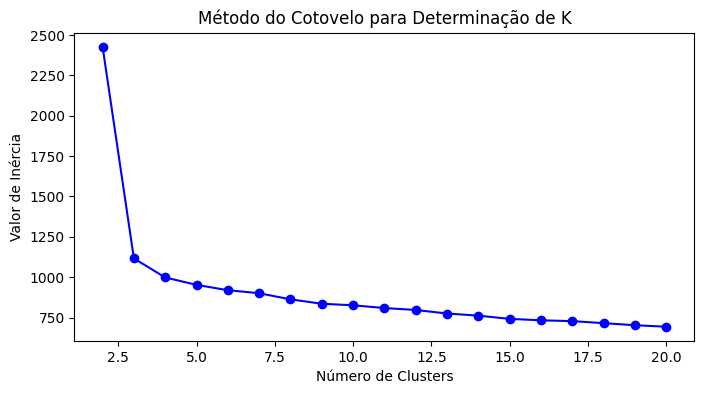

In [222]:
plot_cotovelo(inertia)

### Criando o melhor modelo

In [223]:
model_kmeans = KMeans(n_clusters=3, random_state=45)

# Treina o modelo com os dados escalados
model_kmeans.fit(df_scaled)

kmeans_predict = model_kmeans.predict(df_scaled)

print('Silhueta: ' + str(silhouette_score(df_scaled, kmeans_predict)))

# Salvando o modelo como .pkl
jb.dump(model_kmeans, 'model_kmeans.pkl')

Silhueta: 0.7447500875317523


['model_kmeans.pkl']

**Conclusão do modelo**

Portanto, podemos concluir que a partir do pré processamento dos dados (**codificação das colunas categóricas e escalonamento dos valores numéricos**) foi possível adquirir um **valor de silhueta próximo de 1 (0.74)** e um **valor de inércia menor com a quantidade de 3 clusters** (como é possível observar no gráfico de método do cotovelo).

### Analisando as informações de cada cluster

- Após prever os agrupamentos, iremos salvar os rótulos dos clusters no DataFrame para facilitar a comparação das características. 

- Iremos reverter a escala dos dados para permitir uma análise interpretável das variáveis.

- No final, calcular as médias por cluster para destacar as características mais representativas de cada agrupamento.

Iremos fazer isto no código a seguir.

In [224]:
data_analisys = pd.DataFrame()

# Iremos criar um dataframe com as mesmas colunas da tabela original
# Em seguida iremos reverter o escalonamento para exibir os dados de forma original
data_analisys[df_scaled.columns] = scaler.inverse_transform(df_scaled)
data_analisys.head()

,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,beisebol,...,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas,sexo_F,sexo_M,sexo_NE
0,27.0,49.0,0.0,0.0,10.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0
1,27.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,10.0,0.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0
2,26.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,30.0,0.0,0.0,0.0,1.0,0.0,0.0
3,28.0,32.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,28.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0


Podemos agora adicionar uma nova coluna onde cada amostra irá ter seus respectivo cluster (agrupamento).

In [225]:
data_analisys['cluster'] = model_kmeans.labels_

Para observarmos quais foram as características mais relevantes dentro de cada cluster especificado pelo modelo K-Means, podemos **agrupar os valores de características** (como idade, número de amigos e temas de interesse) **por tipo de cluster**.

Faremos esse agrupamento por média, utilizando *groupby()*. Porém, esta ainda não é a visualização ideal para identificar as características mais ou menos dentro de um cluster, devido à quantidade de dados.

In [226]:
# Média de Clusters (Características mais relevantes por cluster)
cluster_mean = data_analisys.groupby('cluster').mean()

cluster_mean = cluster_mean.T

### Descrevendo cada agrupamento

Para descrever qual característica é mais relevante para cada cluster, iremos ordenar os resultados de média em ordem descendente (do maior para o menor).

In [ ]:
# Ordena em ordem decrescente as colunas 0, 1 e 2 (Referentes ao cluster)
# Utilizaremos apenas o exemplo com o cluster 1, porém é possível fazer o mesmo com os outros clusters
cluster_mean[1].sort_values(ascending=False)

idade                27.031944
numero_de_amigos     26.173611
musica                8.180556
futebol_americano     5.347222
banda                 4.120370
basquete              3.763889
beisebol              3.231481
rock                  3.148148
futebol               2.592593
danca                 2.578704
esportes              2.384259
cabelo                2.009259
shopping              1.652778
tenis                 1.296296
sexo_M                1.000000
natacao               0.976852
bebidas               0.949074
roupas                0.861111
fofo                  0.847222
marcha                0.527778
compras               0.523148
voleibol              0.453704
nossa_marca           0.425926
vestido               0.384259
marca_concorrente     0.263889
softbol               0.097222
animacao              0.092593
sexo_F                0.000000
sexo_NE               0.000000
Name: 1, dtype: float64

É possível observar que o cluster 1 tem como características predominantes a música, em sequência futebol americano, banda, basquete, etc...

Assim como, é possível analisar que apenas pessoas que se identificam com o sexo masculino tem esses tipos de características/comportamentos.